In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # Any results you write to the current directory are saved as output.


In [3]:
# %reload_ext autoreload
# %autoreload 2
# %matplotlib inline


In [4]:
# from fastai import *
# from fastai.vision import *

# import os
# import pandas as pd
# import sys

# from collections import Counter
# from pathlib import Path
# import numpy


In [5]:
# Path??


In [6]:
# import PIL,os,mimetypes
# Path.ls = lambda x: list(x.iterdir())


In [7]:
# path = Path('/kaggle/input/plant-pathology-2020-fgvc7')
# path.ls()


In [8]:
# test_df=pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/test.csv')


In [9]:
# (path/'images').ls()[:3]


In [10]:
# path_tench = path/'images'/'Train_1235.jpg'


In [11]:
# img_fn = (path/'images').ls()[0]
# img_fn


In [12]:
# img = PIL.Image.open(img_fn)
# img #print if you want but the images is realy big


In [13]:
# import numpy
# imga = numpy.array(img)


In [14]:
# imga.shape


In [15]:
# imga[:10,:10,0]


In [16]:
# image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))


In [17]:
# ' '.join(image_extensions)


In [18]:
# def setify(o): return o if isinstance(o,set) else set(listify(o))


In [19]:
# def _get_files(p, fs, extensions=None):
#     p = Path(p)
#     res = [p/f for f in fs if not f.startswith('.')
#            and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
#     return res


In [20]:
# def get_files(path, extensions=None, recurse=False, include=None):
#     path = Path(path)
#     extensions = setify(extensions)
#     extensions = {e.lower() for e in extensions}
#     if recurse:
#         res = []
#         for i,(p,d,f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filenames)
#             if include is not None and i==0: d[:] = [o for o in d if o in include]
#             else:                            d[:] = [o for o in d if not o.startswith('.')]
#             res += _get_files(p, f, extensions)
#         return res
#     else:
#         f = [o.name for o in os.scandir(path) if o.is_file()]
#         return _get_files(path, f, extensions)


In [21]:
# get_files(path, image_extensions, recurse=True)[:3]


In [22]:
# all_fns = get_files(path, image_extensions, recurse=True)
# len(all_fns)


In [23]:
# %timeit -n 10 get_files(path, image_extensions, recurse=True)


In [24]:
# bs=64


In [25]:
# def get_dls(train_ds, valid_ds, bs, **kwargs):
#     return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
#             DataLoader(valid_ds, batch_size=bs*2, **kwargs))


In [26]:
# labels for our classes
# LABEL_COLS = ['healthy', 'multiple_diseases', 'rust', 'scab']


In [27]:
# from fastai import *
# from fastai.vision import *

# import os
# import pandas as pd
# import sys

# from collections import Counter
# from pathlib import Path
# import numpy


In [28]:
# label_from_df??


In [29]:
# test = (ImageList.from_df(test_df,path,
#                           folder='images',
#                           suffix='.jpg',
#                           cols='image_id'))


In [30]:
# test


In [31]:
# def get_transforms(do_flip:bool=True,mixup:float=0.4, flip_vert:bool=False, max_rotate:float=10., max_zoom:float=1.1,
#                    max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75,
#                    p_lighting:float=0.75, xtra_tfms:Optional[Collection[Transform]]=None)->Collection[Transform]:
#     "Utility func to easily create a list of flip, rotate, `zoom`, warp, lighting transforms."
#     res = [rand_crop()]
#     if do_flip:    res.append(dihedral_affine() if flip_vert else flip_lr(p=0.5))
#     if max_warp:   res.append(symmetric_warp(magnitude=(-max_warp,max_warp), p=p_affine))
#     if max_rotate: res.append(rotate(degrees=(-max_rotate,max_rotate), p=p_affine))
#     if max_zoom>1: res.append(rand_zoom(scale=(1.,max_zoom), p=p_affine))
#     if mixup: MixUp()
#     if max_lighting:
#         res.append(brightness(change=(0.5*(1-max_lighting), 0.5*(1+max_lighting)), p=p_lighting))
#         res.append(contrast(scale=(1-max_lighting, 1/(1-max_lighting)), p=p_lighting))
#     #       train                   , valid
#     return (res + listify(xtra_tfms), [crop_pad()])


In [32]:
# Γ = lambda x: x.lgamma().exp()


In [33]:
# facts = [math.factorial(i) for i in range(7)]


In [34]:
# plt.plot(range(7), facts, 'ro')
# plt.plot(torch.linspace(0,6), Γ(torch.linspace(0,6)+1))
# plt.legend(['factorial','Γ']);


In [35]:
# torch.linspace(0,0.9,10)


In [36]:
# _,axs = plt.subplots(1,2, figsize=(12,4))
# x = torch.linspace(0,1, 100)
# for α,ax in zip([0.1,0.8], axs):
#     α = tensor(α)
# #     y = (x.pow(α-1) * (1-x).pow(α-1)) / (gamma_func(α ** 2) / gamma_func(α))
#     y = (x**(α-1) * (1-x)**(α-1)) / (Γ(α)**2 / Γ(2*α))
#     ax.plot(x,y)
#     ax.set_title(f"α={α:.1}")


In [37]:
#export
# class NoneReduce():
#     def __init__(self, loss_func): 
#         self.loss_func,self.old_red = loss_func,None
        
#     def __enter__(self):
#         if hasattr(self.loss_func, 'reduction'):
#             self.old_red = getattr(self.loss_func, 'reduction')
#             setattr(self.loss_func, 'reduction', 'none')
#             return self.loss_func
#         else: return partial(self.loss_func, reduction='none')
        
#     def __exit__(self, type, value, traceback):
#         if self.old_red is not None: setattr(self.loss_func, 'reduction', self.old_red)


In [38]:
# from torch.distributions.beta import Beta

# def unsqueeze(input, dims):
#     for dim in listify(dims): input = torch.unsqueeze(input, dim)
#     return input

# def reduce_loss(loss, reduction='mean'):
#     return loss.mean() if reduction=='mean' else loss.sum() if reduction=='sum' else loss


In [39]:
# class MixUp():
#     _order = 90 #Runs after normalization and cuda
#     def __init__(self, α:float=0.4): self.distrib = Beta(tensor([α]), tensor([α]))
    
#     def begin_fit(self): self.old_loss_func,self.run.loss_func = self.run.loss_func,self.loss_func
    
#     def begin_batch(self):
#         if not self.in_train: return #Only mixup things during training
#         λ = self.distrib.sample((self.yb.size(0),)).squeeze().to(self.xb.device)
#         λ = torch.stack([λ, 1-λ], 1)
#         self.λ = unsqueeze(λ.max(1)[0], (1,2,3))
#         shuffle = torch.randperm(self.yb.size(0)).to(self.xb.device)
#         xb1,self.yb1 = self.xb[shuffle],self.yb[shuffle]
#         self.run.xb = lin_comb(self.xb, xb1, self.λ)
        
#     def after_fit(self): self.run.loss_func = self.old_loss_func
    
#     def loss_func(self, pred, yb):
#         if not self.in_train: return self.old_loss_func(pred, yb)
#         with NoneReduce(self.old_loss_func) as loss_func:
#             loss1 = loss_func(pred, yb)
#             loss2 = loss_func(pred, self.yb1)
#         loss = lin_comb(loss1, loss2, self.λ)
#         return reduce_loss(loss, getattr(self.old_loss_func, 'reduction', 'mean'))


In [40]:
#transform the data to get a bigger training set
# tfms = get_transforms(flip_vert=True,mixup=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)


In [41]:
# tfms = get_transforms(mixup=1)


In [42]:
# from_csv??


In [43]:
# class ImageList(ItemList):
#     "`ItemList` suitable for computer vision."
#     _bunch,_square_show,_square_show_res = ImageDataBunch,True,True
#     def __init__(self, *args, convert_mode='RGB', after_open:Callable=None, **kwargs):
#         super().__init__(*args, **kwargs)
#         self.convert_mode,self.after_open = convert_mode,after_open
#         self.copy_new += ['convert_mode', 'after_open']
#         self.c,self.sizes = 3,{}

#     def open(self, fn):
#         "Open image in `fn`, subclass and overwrite for custom behavior."
#         return open_image(fn, convert_mode=self.convert_mode, after_open=self.after_open)

#     def get(self, i):
#         fn = super().get(i)
#         res = self.open(fn)
#         self.sizes[i] = res.size
#         return res
    
#     @classmethod
#     def from_folder(cls, path:PathOrStr='.', extensions:Collection[str]=None, **kwargs)->ItemList:
#         "Get the list of files in `path` that have an image suffix. `recurse` determines if we search subfolders."
#         extensions = ifnone(extensions, image_extensions)
#         return super().from_folder(path=path, extensions=extensions, **kwargs)

#     @classmethod
#     def from_df(cls, df:DataFrame, path:PathOrStr, cols:IntsOrStrs=0, folder:PathOrStr=None, suffix:str='', **kwargs)->'ItemList':
#         "Get the filenames in `cols` of `df` with `folder` in front of them, `suffix` at the end."
#         suffix = suffix or ''
#         res = super().from_df(df, path=path, cols=cols, **kwargs)
#         pref = f'{res.path}{os.path.sep}'
#         if folder is not None: pref += f'{folder}{os.path.sep}'
#         res.items = np.char.add(np.char.add(pref, res.items.astype(str)), suffix)
#         return res

#     @classmethod
#     def from_csv(cls, path:PathOrStr, csv_name:str, header:str='infer', delimiter:str=None, **kwargs)->'ItemList':
#         "Get the filenames in `path/csv_name` opened with `header`."
#         path = Path(path)
#         df = pd.read_csv(path/csv_name, header=header, delimiter=delimiter)
#         return cls.from_df(df, path=path, **kwargs)

#     def reconstruct(self, t:Tensor): return Image(t.float().clamp(min=0,max=1))

#     def show_xys(self, xs, ys, imgsize:int=4, figsize:Optional[Tuple[int,int]]=None, **kwargs):
#         "Show the `xs` (inputs) and `ys` (targets) on a figure of `figsize`."
#         rows = int(np.ceil(math.sqrt(len(xs))))
#         axs = subplots(rows, rows, imgsize=imgsize, figsize=figsize)
#         for x,y,ax in zip(xs, ys, axs.flatten()): x.show(ax=ax, y=y, **kwargs)
#         for ax in axs.flatten()[len(xs):]: ax.axis('off')
#         plt.tight_layout()

#     def show_xyzs(self, xs, ys, zs, imgsize:int=4, figsize:Optional[Tuple[int,int]]=None, **kwargs):
#         "Show `xs` (inputs), `ys` (targets) and `zs` (predictions) on a figure of `figsize`."
#         if self._square_show_res:
#             title = 'Ground truth\nPredictions'
#             rows = int(np.ceil(math.sqrt(len(xs))))
#             axs = subplots(rows, rows, imgsize=imgsize, figsize=figsize, title=title, weight='bold', size=12)
#             for x,y,z,ax in zip(xs,ys,zs,axs.flatten()): x.show(ax=ax, title=f'{str(y)}\n{str(z)}', **kwargs)
#             for ax in axs.flatten()[len(xs):]: ax.axis('off')
#         else:
#             title = 'Ground truth/Predictions'
#             axs = subplots(len(xs), 2, imgsize=imgsize, figsize=figsize, title=title, weight='bold', size=14)
#             for i,(x,y,z) in enumerate(zip(xs,ys,zs)):
#                 x.show(ax=axs[i,0], y=y, **kwargs)
#                 x.show(ax=axs[i,1], y=z, **kwargs)


In [44]:
# np.random.seed(42)
# src=(ImageList.from_csv(path,'train.csv',folder='images',suffix='.jpg')
# #     .split_by_rand_pct(0.2)
#     .label_from_df(cols=LABEL_COLS,label_cls = MultiCategoryList))


In [45]:
# data = (src.transform(tfms, size=253).add_test(test)
#         .databunch(num_workers=0).normalize(imagenet_stats))


In [46]:
# data.classes


In [47]:
# data.show_batch(rows=3, figsize=(12,9))


In [48]:
# tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]

# il = ImageList.from_csv(path,'train.csv',folder='images',suffix='.jpg')
# sd = SplitData.split_by_func(il, partial(grandparent_splitter, valid_name='Test'))
# ll = label_from_df(cols=LABEL_COLS,label_cls = MultiCategoryList)
# data = ll.to_databunch(bs, c_in=3, c_out=4, num_workers=4)


In [49]:
# data.classes


In [50]:
import numpy as np
import pandas as pd
import os
import random, re, math
import tensorflow as tf, tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from kaggle_datasets import KaggleDatasets

print(tf.__version__)
print(tf.keras.__version__)


2025-08-18 07:57:01.246809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755503821.260053       8 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755503821.264395       8 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-18 07:57:01.280525: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.18.0
3.8.0


In [51]:
!pip install efficientnet
import efficientnet.tfkeras as efn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [efficientnet]


In [52]:
# tf.data.experimental.AUTOTUNE??


In [53]:
AUTO = tf.data.experimental.AUTOTUNE #basic Convert a number or string to an integer, or return 0 if no arguments
#are given. for more detail uncommen the cell above
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

print("REPLICAS: ", strategy.num_replicas_in_sync)


# Data access
GCS_DS_PATH = KaggleDatasets().get_gcs_path()


REPLICAS:  1


BackendError: Unexpected response from the service. Response: {'errors': ['Unauthenticated'], 'error': {'code': 16}, 'wasSuccessful': False}.

(1365, 2048, 3)


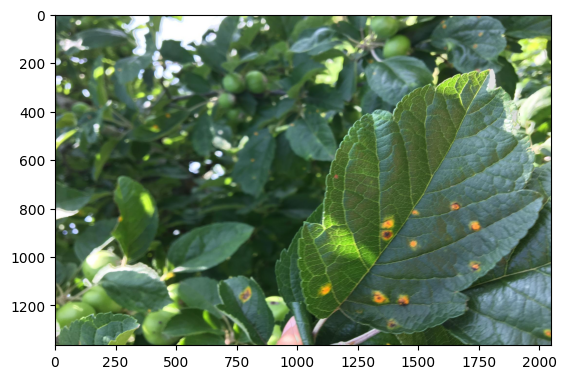

In [54]:
from matplotlib import pyplot as plt

img = plt.imread('../input/plant-pathology-2020-fgvc7/images/Train_0.jpg')
print(img.shape)
plt.imshow(img)


In [55]:
path='../input/plant-pathology-2020-fgvc7/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
sub = pd.read_csv(path + 'sample_submission.csv')

train_paths = train.image_id.apply(lambda x: GCS_DS_PATH + '/images/' + x + '.jpg').values #put out datapath on the TPU
test_paths = test.image_id.apply(lambda x: GCS_DS_PATH + '/images/' + x + '.jpg').values #put out datapath on the TPU

train_labels = train.loc[:, 'healthy':].values #you can also use '1' instead of 'healthy' but all it does is taking all the results the 4 different labels


NameError: name 'GCS_DS_PATH' is not defined

In [56]:
train #Seeing the training csv-file


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,1,0
1,Train_1,1,0,0,0
2,Train_2,0,0,1,0
3,Train_3,1,0,0,0
4,Train_4,0,0,1,0
...,...,...,...,...,...
1633,Train_1633,1,0,0,0
1634,Train_1634,0,1,0,0
1635,Train_1635,1,0,0,0
1636,Train_1636,0,0,0,1


In [57]:
train_labels #all the rows for the labels we want to classify


NameError: name 'train_labels' is not defined

In [58]:
nb_classes = 4 #number of labels, this will be used for our output layer
BATCH_SIZE = 8 * strategy.num_replicas_in_sync # this is 8 on TPU v3-8, it is 1 on CPU and GPU #try change it to 16
img_size = 768 #u decide but bigger images take longer to train but higher kvali and smaller images is faster but lower kvali
EPOCHS = 40 #number of training rounds


In [59]:
x = tf.constant([1.8, 2.2], dtype=tf.float32)
print(type(x))
tf.dtypes.cast(x, tf.int32)  # [1, 2], dtype=tf.int32
print(type(x))


<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


2025-08-18 07:57:09.698924: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [60]:
type(x)


tensorflow.python.framework.ops.EagerTensor

In [61]:
#decode_image label every image if it has a label from csv-file and return also the image that has no label
def decode_image(filename, label=None, image_size=(img_size, img_size)):
    bits = tf.io.read_file(filename)#get the filename
    image = tf.image.decode_jpeg(bits, channels=3) #channel representing some aspect of information about the image 
    #and u can have 100+ channels if you want but it is proven to be good to put it at 3
    image = tf.cast(image, tf.float32) / 255.0 #tf.cast means = Casts a tensor to a new type. so the images tensor becomes a type float
    image = tf.image.resize(image, image_size) #resize the image for the size given above
    if label is None:  #if there is no label for an image
        return image #jusst return the image
    else:
        return image, label #else return the image with the label
    
#data_augment just take the images and do som augment to them
def data_augment(image, label=None, seed=2020): 
    image = tf.image.random_flip_left_right(image, seed=seed) #flip randomly images to left or right
    image = tf.image.random_flip_up_down(image, seed=seed) #flip the images randomly up or down
    image=tf.image.adjust_saturation(image, 10)
    image=tf.image.resize_with_crop_or_pad(img, 800, 900)
    
    #for every new image
    if label is None:  #if there is no label for an image
        return image#jusst return the image
    else:
        return image, label #else return the image with the label


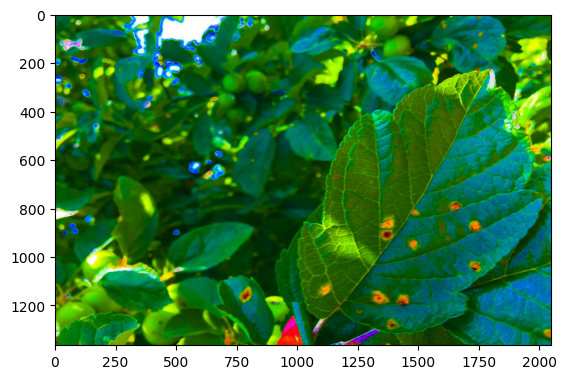

In [62]:
saturated = tf.image.adjust_saturation(img, 10)
plt.imshow(saturated)


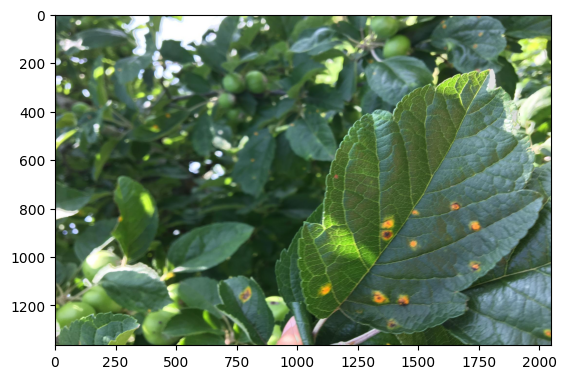

In [63]:
plt.imshow(img) #if we look at the before and after picture it is clear to see that illness of the plant is much clear on the saturated image, so we are gonna use it in our data aurgment function above 


In [64]:
#making the training dataset for more detail on the given functions uncommen the cell below
train_dataset = (
    tf.data.Dataset #explaned above nut just a API blok iniziator
    .from_tensor_slices((train_paths, train_labels)) #Creates a `Dataset` whose elements are slices of the given tensors
    # 'from_tensor_slices' --> The given tensors are sliced along their first dimension. This operation
#     preserves the structure of the input tensors, removing the first dimension
#     of each tensor and using it as the dataset dimension. All input tensors
#     must have the same size in their first dimensions.
    .map(decode_image, num_parallel_calls=AUTO) #Maps `map_func` across the elements of this dataset# note here is 'map_func'='decode_image' which returned the labels with the images
    #This transformation applies `map_func` to each element of this dataset, and
#     returns a new dataset containing the transformed elements, in the same
#     order as they appeared in the input. `map_func` can be used to change both
#     the values and the structure of a dataset's elements. For example, adding 1
#     to each element, or projecting a subset of element components.
    .map(data_augment, num_parallel_calls=AUTO)#note here we use data_augment wich fliped the images for ech element in the dataset
    .repeat() #Repeats this dataset so each original value is seen `count` times. #see exsampel below #  The default behavior (if
        #count` is `None` or `-1`) is for the dataset be repeated indefinitely.

    .shuffle(512) #Randomly shuffles the elements of this dataset.#and it randomize by 512 (u set value) each time
    .batch(BATCH_SIZE) 
    .prefetch(AUTO) #Creates a `Dataset` that prefetches elements from this dataset.
#     Most dataset input pipelines should end with a call to `prefetch`. This
#     allows later elements to be prepared while the current element is being
#     processed. This often improves latency and throughput, at the cost of
#     using additional memory to store prefetched elements.
    )


NameError: name 'train_paths' is not defined

In [65]:
#  tf.data.Dataset??


In [66]:
test_dataset = (
    tf.data.Dataset #explaned above nut just a API blok iniziator
    .from_tensor_slices(test_paths)
    .map(decode_image, num_parallel_calls=AUTO) 
    #note we dont flip the testing images because then we cant validate the predictions from the model
    .batch(BATCH_SIZE)
)


NameError: name 'test_paths' is not defined

In [67]:
# tf.keras.callbacks??


In [68]:
#predifened learning rates for optimal preformaze
LR_START = 0.00001
LR_MAX = 0.0001 * strategy.num_replicas_in_sync
LR_MIN = 0.00001
LR_RAMPUP_EPOCHS = 15
LR_SUSTAIN_EPOCHS = 3
LR_EXP_DECAY = .8
#here we change the learning depending on what epoch we are at 
def lrfn(epoch):
    if epoch  LR_RAMPUP_EPOCHS: #if epoch is lower then 15
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START #take this learning rate
    elif epoch  LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:#if epoch is lower then 15+3=18 
        lr = LR_MAX #then take this learning rate
    else: #else if is above 18 then 
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN#take this learning rate
    return lr
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True) #create a callback to make the functionality possible when we do the actual training. 
#verbose = true just means we want to see the traning proces bar

#plot the learning rate schedular 
rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))


SyntaxError: invalid syntax (1080353953.py, line 10)

In [69]:
def get_model():
    #pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
#     pretrained_model = tf.keras.applications.Xception(weights='imagenet', input_shape=(img_size, img_size, 3), include_top=False)
    #pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMAGE_SIZE, 3])
#     pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
    #pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
    # EfficientNet can be loaded through efficientnet.tfkeras library (https://github.com/qubvel/efficientnet)
    pretrained_model = efn.EfficientNetB7(weights='imagenet', include_top=False, pooling='avg', input_shape=(img_size, img_size, 3))
    pretrained_model.trainable = True
    
    model = tf.keras.Sequential([
        pretrained_model,
#         tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4, activation='softmax') #4 since there are 4 labels and therefor 4 diferent predictions 
    ])

#     x = pretrained_model.output
#     predictions = Dense(4, activation="softmax")(x)
    return model


In [70]:
with strategy.scope():
    model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


258434480/258434480 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [71]:
#  model.compile(
#         optimizer='adam',
#         loss = 'categorical_crossentropy',
#         metrics=['accuracy']
#     )


In [72]:
%%time
history=model.fit(
    train_dataset, 
    steps_per_epoch=train_labels.shape[0] // BATCH_SIZE,
    callbacks=[lr_callback],
    epochs=16
)


NameError: name 'train_dataset' is not defined

In [73]:
%%time
probs = model.predict(test_dataset)


NameError: name 'test_dataset' is not defined

In [74]:
sub.loc[:, 'healthy':] = probs
sub.to_csv('submission.csv', index=False)
sub.head()


NameError: name 'probs' is not defined

In [75]:
# train_paths


In [76]:
# data.classes


In [77]:
# class AvgStatsCallback(Callback):
#     def __init__(self, metrics):
#         self.train_stats,self.valid_stats = AvgStats(metrics,True),AvgStats(metrics,False)
        
#     def begin_epoch(self):
#         self.train_stats.reset()
#         self.valid_stats.reset()
        
#     def after_loss(self):
#         stats = self.train_stats if self.in_train else self.valid_stats
#         with torch.no_grad(): stats.accumulate(self.run)
    
#     def after_epoch(self):
#         print(self.train_stats)
#         print(self.valid_stats)


In [78]:
# def accuracy(out, yb): return (torch.argmax(out, dim=1)==yb).float().mean()


In [79]:
# class CudaCallback(Callback):
#     def begin_fit(self): self.model.cuda()
#     def begin_batch(self): self.run.xb,self.run.yb = self.xb.cuda(),self.yb.cuda()


In [80]:
# cbfs = [partial(AvgStatsCallback,accuracy),
#         CudaCallback]


In [81]:
# def normalize_chan(x, mean, std):
#     return (x-mean[...,None,None]) / std[...,None,None]

# _m = tensor([0.47, 0.48, 0.45])
# _s = tensor([0.29, 0.28, 0.30])
# norm_imagenette = partial(normalize_chan, mean=_m.cuda(), std=_s.cuda())


In [82]:
# class BatchTransformXCallback(Callback):
#     _order=2
#     def __init__(self, tfm): self.tfm = tfm
#     def begin_batch(self): self.run.xb = self.tfm(self.xb)

# def view_tfm(*size):
#     def _inner(x): return x.view(*((-1,)+size))
#     return _inner


In [83]:
# cbfs.append(partial(BatchTransformXCallback, norm_imagenette))


In [84]:
# nfs = [64,64,128,256]


In [85]:
# import math
# def prev_pow_2(x): return 2**math.floor(math.log2(x))

# def get_cnn_layers(data, nfs, layer, **kwargs):
#     def f(ni, nf, stride=2): return layer(ni, nf, 3, stride=stride, **kwargs)
#     l1 = data.c
#     l2 = prev_pow_2(l1*3*3)
#     layers =  [f(l1  , l2  , stride=1),
#                f(l2  , l2*2, stride=2),
#                f(l2*2, l2*4, stride=2)]
#     nfs = [l2*4] + nfs
#     layers += [f(nfs[i], nfs[i+1]) for i in range(len(nfs)-1)]
#     layers += [nn.AdaptiveAvgPool2d(1), Lambda(flatten), 
#                nn.Linear(nfs[-1], data.c)]
#     return layers

# def get_cnn_model(data, nfs, layer, **kwargs):
#     return nn.Sequential(*get_cnn_layers(data, nfs, layer, **kwargs))

# def get_learn_run(nfs, data, lr, layer, cbs=None, opt_func=None, **kwargs):
#     model = get_cnn_model(data, nfs, layer, **kwargs)
#     init_cnn(model)
#     return get_runner(model, data, lr=lr, cbs=cbs, opt_func=opt_func)


In [86]:
# def combine_scheds(pcts, scheds):
#     assert sum(pcts) == 1.
#     pcts = tensor([0] + listify(pcts))
#     assert torch.all(pcts >= 0)
#     pcts = torch.cumsum(pcts, 0)
#     def _inner(pos):
#         idx = (pos >= pcts).nonzero().max()
#         actual_pos = (pos-pcts[idx]) / (pcts[idx+1]-pcts[idx])
#         return scheds[idx](actual_pos)
#     return _inner


In [87]:
# def annealer(f):
#     def _inner(start, end): return partial(f, start, end)
#     return _inner

# @annealer
# def sched_lin(start, end, pos): return start + pos*(end-start)

# import torch


In [88]:
# @annealer
# def sched_cos(start, end, pos): return start + (1 + math.cos(math.pi*(1-pos))) * (end-start) / 2
# @annealer
# def sched_no(start, end, pos):  return start
# @annealer
# def sched_exp(start, end, pos): return start * (end/start) ** pos

# def cos_1cycle_anneal(start, high, end):
#     return [sched_cos(start, high), sched_cos(high, end)]

# #This monkey-patch is there to be able to plot tensors
# torch.Tensor.ndim = property(lambda x: len(x.shape))


In [89]:
# sched = combine_scheds([0.3,0.7], cos_1cycle_anneal(0.1,0.3,0.05))


In [90]:
# class ParamScheduler(Callback):
#     _order=1
#     def __init__(self, pname, sched_funcs): self.pname,self.sched_funcs = pname,sched_funcs
        
#     def begin_fit(self):
#         if not isinstance(self.sched_funcs, (list,tuple)):
#             self.sched_funcs = [self.sched_funcs] * len(self.opt.param_groups)

#     def set_param(self):
#         assert len(self.opt.param_groups)==len(self.sched_funcs)
#         for pg,f in zip(self.opt.param_groups,self.sched_funcs):
#             pg[self.pname] = f(self.n_epochs/self.epochs)
            
#     def begin_batch(self): 
#         if self.in_train: self.set_param()


In [91]:
# def flatten(x):      return x.view(x.shape[0], -1)


In [92]:
# def init_cnn(m, uniform=False):
#     f = init.kaiming_uniform_ if uniform else init.kaiming_normal_
#     for l in m:
#         if isinstance(l, nn.Sequential):
#             f(l[0].weight, a=0.1)
#             l[0].bias.data.zero_()


In [93]:
# def get_learn_run(nfs, data, lr, layer, cbs=None, opt_func=None, uniform=False, **kwargs):
#     model = get_cnn_model(data, nfs, layer, **kwargs)
#     init_cnn(model, uniform=uniform)
#     return get_runner(model, data, lr=lr, cbs=cbs, opt_func=opt_func)


In [94]:
# from torch.nn import init


In [95]:
# arch = models.resnet50


In [96]:
# resnet50??


In [97]:
# models??


In [98]:
# def accuracy_thresh(y_pred:Tensor, y_true:Tensor, thresh:float=0.5, sigmoid:bool=True)->Rank0Tensor:
#     "Computes accuracy when `y_pred` and `y_true` are the same size."
#     if sigmoid: y_pred = y_pred.sigmoid()
#     return ((y_pred>thresh).byte()==y_true.byte()).float().mean()


In [99]:
# accuracy_thresh??


In [100]:
# cnn_config??


In [101]:
# create_cnn_model??


In [102]:
# create_cnn??


In [103]:
# arch = models.resnet50


In [104]:
# acc_02 = partial(accuracy_thresh, thresh=0.2)
# f_score = partial(fbeta, thresh=0.2)
# learn = create_cnn(data, arch, metrics=[acc_02], model_dir='/kaggle/working')


In [105]:
# lr=1e-03
# learn.fit_one_cycle(5,slice(lr))


In [106]:
# learn,run = get_learn_run(nfs, data, 0.2, conv_layer, cbs=cbfs+[
#     partial(ParamScheduler, 'lr', sched)
# ])


In [107]:
# path2 = Path('/kaggle/input/plant-pathology-2020-fgvc7/images')


In [108]:
# df = pd.read_csv(path/'train.csv')
# df.head()


In [109]:
# test_df = pd.read_csv('../input/plant-pathology-2020-fgvc7/test.csv')
